In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
real_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/weather_solar_actual.csv')

In [5]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0
...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0


In [6]:
forecast_weather['Forecast time'] = pd.to_datetime(forecast_weather['Forecast time'])

In [7]:
real_weather = real_weather.iloc[:,2:]

In [8]:
real_weather.columns = ['date','temp','wind_speed','wind_dir','humidity']

In [9]:
forecast_weather['real_time'] = ''

In [10]:
for i in range(len(forecast_weather)):
    forecast_weather['real_time'][i] = forecast_weather['Forecast time'][i] + datetime.timedelta(hours=forecast_weather['forecast'][i])

In [11]:
forecast_weather_eda = forecast_weather.groupby(['real_time']).mean().drop('forecast', axis=1)

In [12]:
from scipy import interpolate

In [13]:
forecast_weather_eda.reset_index(inplace=True)

In [14]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [15]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [16]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection,real_time
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0,2020-09-01 15:00:00
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0,2020-09-01 18:00:00
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0,2020-09-01 21:00:00
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0,2020-09-02 00:00:00
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0,2020-09-02 03:00:00
...,...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0,2022-07-03 20:00:00
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0,2022-07-03 21:00:00
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0,2022-07-03 22:00:00
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0,2022-07-03 23:00:00


In [17]:
solar['datetime'] = pd.to_datetime(solar['datetime'])

In [18]:
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

In [19]:
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()

In [20]:
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')

In [21]:
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')

In [22]:
solar_eda.date = pd.to_datetime(solar_eda.date)

In [23]:
solar_eda = solar_eda.set_index('date')

In [24]:
real_weather = real_weather.set_index('date')

In [25]:
forecast_weather_eda.set_index('real_time', inplace=True)

In [26]:
forecast_x = forecast_weather_eda.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [27]:
real_weather.index = pd.to_datetime(real_weather.index)

In [28]:
real_x = real_weather.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [29]:
solar_eda = solar_eda.fillna(0)

In [30]:
from sklearn.preprocessing import StandardScaler 

In [31]:
sc = StandardScaler()

In [32]:
solar_eda

,year,month,day,hour,target
date,,,,,
2020-09-10 00:00:00,2020,9,10,0,0.00
2020-09-10 01:00:00,2020,9,10,1,0.00
2020-09-10 02:00:00,2020,9,10,2,0.00
2020-09-10 03:00:00,2020,9,10,3,0.00
2020-09-10 04:00:00,2020,9,10,4,0.00
...,...,...,...,...,...
2022-04-30 19:00:00,2022,4,30,19,0.85
2022-04-30 20:00:00,2022,4,30,20,0.00
2022-04-30 21:00:00,2022,4,30,21,0.00


In [33]:
real_x = pd.DataFrame(sc.fit_transform(real_x), columns=['temp','wind_speed','wind_dir','humidity'])
solar_eda = pd.DataFrame(sc.fit_transform(solar_eda), columns = ['year','month','day','hour','target'])

In [34]:
y = solar_eda.target

In [35]:
train_x = real_x.iloc[:int(len(real_x)*0.8),:]
test_x = real_x.iloc[int(len(real_x)*0.8):,:]

In [36]:
train_y = y.iloc[:int(len(y)*0.8)]
test_y = y.iloc[int(len(y)*0.8):]

In [37]:
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3

In [38]:
latitude = 37.456
longitude = 126.705

In [39]:
tus = Location(latitude, longitude, 'ROK')

In [40]:
time = pd.date_range(start=forecast_weather_eda.index.min(), end = forecast_weather_eda.index.max(), freq='H', tz = tus.tz)

In [41]:
cs = tus.get_clearsky(time)

In [42]:
cs

,ghi,dni,dhi
2020-09-01 15:00:00+09:00,672.205540,763.020810,126.066169
2020-09-01 16:00:00+09:00,509.779364,695.181238,111.699856
2020-09-01 17:00:00+09:00,313.589459,565.928253,89.242537
2020-09-01 18:00:00+09:00,109.238226,298.243072,49.738810
2020-09-01 19:00:00+09:00,0.010326,0.070536,0.010165
...,...,...,...
2022-07-03 20:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 21:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 22:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 23:00:00+09:00,0.000000,0.000000,0.000000


<Axes: >

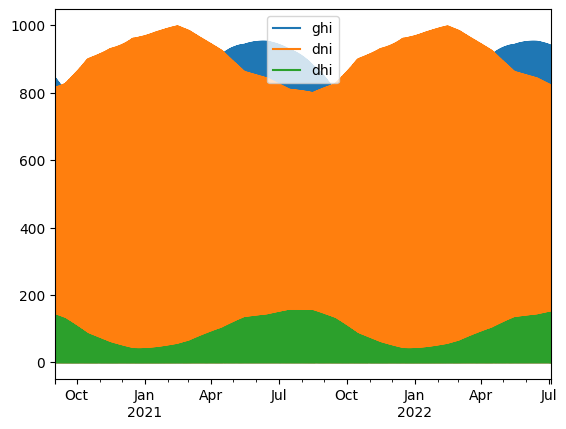

In [43]:
cs.plot()

<Axes: >

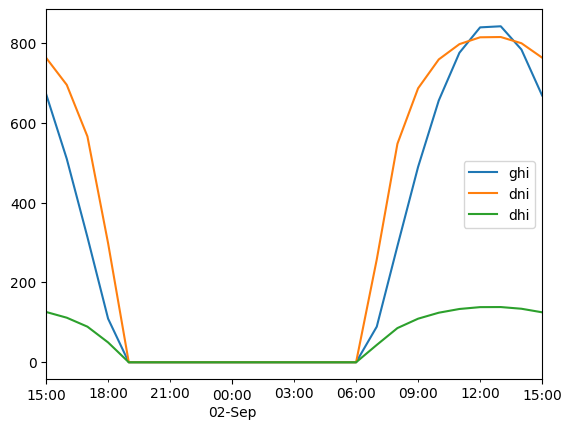

In [44]:
cs.iloc[:25,:].plot()

### DNI : Direct normal irradiance
### DHI : Diffuse horizontal irradiance
### GHI : Global solar radiation on a horizontal irradiance

---
# LSTM model

In [45]:
x_test = tf.convert_to_tensor(test_x.values, dtype=tf.float32)
x_train = tf.convert_to_tensor(train_x.values, dtype=tf.float32)

In [46]:
x_train

<tf.Tensor: shape=(11481, 4), dtype=float32, numpy=
array([[ 0.8684744 ,  0.23210898, -0.30905777,  1.5428333 ],
       [ 0.8684744 ,  0.6914258 , -0.30905777,  1.6568648 ],
       [ 0.88804686, -0.03035778, -0.30905777,  1.6568648 ],
       ...,
       [-1.8227336 , -0.09597447, -1.7951756 , -1.1369047 ],
       [-1.842306  , -0.620908  , -1.144999  , -0.9658576 ],
       [-1.8325199 , -0.35844123, -1.144999  , -0.9088419 ]],
      dtype=float32)>

In [48]:
y_test = tf.convert_to_tensor(test_y.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(train_y.values, dtype=tf.float32)

In [49]:
x_tr = tf.reshape(x_train, (-1, 4, 1))
y_tr = tf.reshape(y_train, (-1, 1, 1))

x_te = tf.reshape(x_test, (-1, 4, 1))

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(4,1), return_sequences=True))
model.add(tf.keras.layers.LSTM(200))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(150))
model.add(tf.keras.layers.Dense(1))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 4, 100)            40800     
                                                                 
 lstm_12 (LSTM)              (None, 200)               240800    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 311,901
Trainable params: 311,901
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss = 'mse', optimizer = 'adam')

In [61]:
his = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
359/359 [==============================] - 5s 5ms/step - loss: 0.8681
Epoch 2/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8531
Epoch 3/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8523
Epoch 4/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8461
Epoch 5/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8406
Epoch 6/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8379
Epoch 7/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8374
Epoch 8/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8362
Epoch 9/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8337
Epoch 10/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8328
Epoch 11/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8345
Epoch 12/300
359/359 [==============================] - 2s 5ms/step - loss: 0.8296
Epoch 13/300


In [62]:
predict = model.predict(x_test)

90/90 [==============================] - 1s 1ms/step


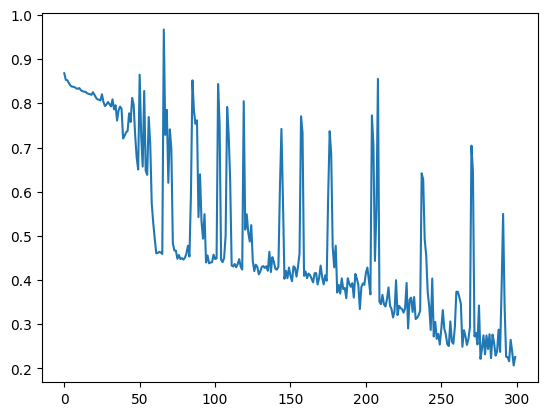

In [72]:
plt.plot(his.history['loss'])

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test, predict)

1.1473131

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test, predict)

0.042676915761948764

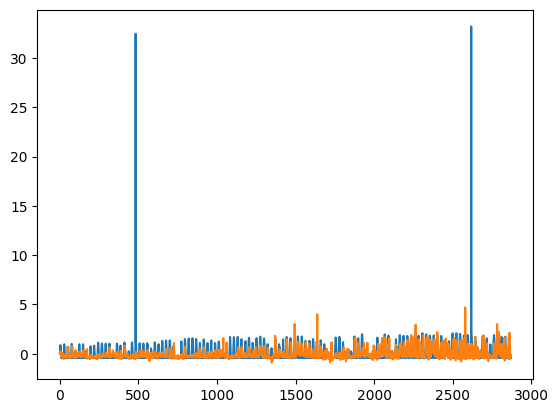

In [67]:
plt.plot(y_test)
plt.plot(predict)

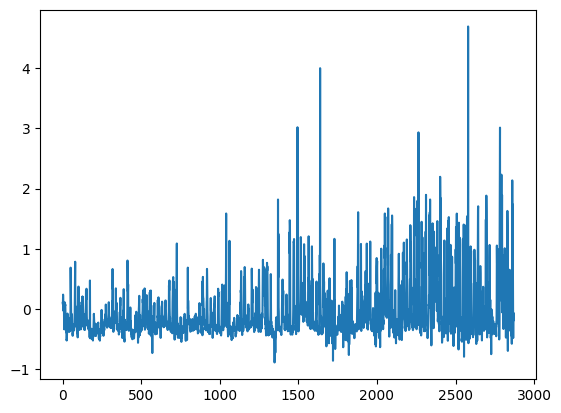

In [68]:
plt.plot(predict.reshape(-1,1))

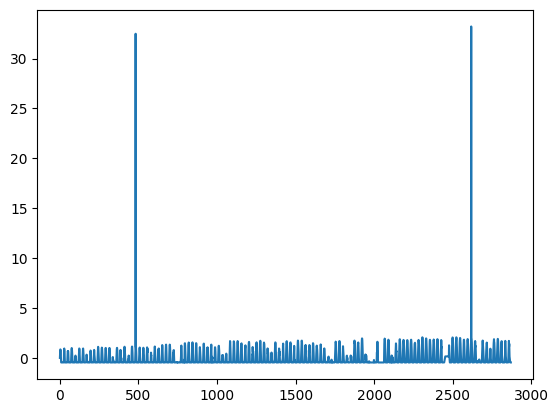

In [69]:
plt.plot(y_test)